### Analayse von Retail Sales Daten - Ein Data Analytics Projekt

**Erstellt von:** David Hüttelmeyer  

**Projektbeschreibung:**

In diesem Projekt habe ich die Verkaufsdaten eines fiktiven Einzelhandelunternehmens analysiert, um wichtige Muster und Trends im Kaufverhalten zu identifizieren. Die Ergebnisse habe ich in Visualisierungen im Jupyter-Notebook präsentiert, als auch in einem Tableau-Dashboard.

**Die zentralen Fragen, die beantwortet werden sollten:** 
1. Wie entwickelte sich der Umsatz pro Monat?
2. Welche Altersgruppe brachte den höchsten Umsatz?
3. Gibt es Unterschiede im Kaufverhalten zwischen Frauen und Männern?
4. Welche Produktkategorie ist der Bestseller? 

### Datenquelle und Beschreibung 
Die Daten stammen aus dem Retail Sales Dataset von Kaggle, das unter folgendem Link verfügbar ist:  

https://www.kaggle.com/datasets/mohammadtalib786/retail-sales-dataset

Der Datensatz enthält folgende Spalten:
- Transaction ID
- Date
- Customer ID
- Gender
- Age
- Product Category
- Quantity
- Price per Unit
- Total Amount

### Datenbereinigung und Vorbereitung

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV-Datei einlesen 
df = pd.read_csv("data.csv")

In [12]:
# Duplikate entfernen
df = df.drop_duplicates()

In [13]:
# Anzahl der Zeilen des Datensatzes
zeilen = df.shape[0]
print(zeilen)

1000


In [14]:
# Ausgabe der ersten fünf Zeilen jeder Spalte
print(df.head())

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [5]:
# Überprüfen der fehlenden Werte
print(df.isnull().sum()) 

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [6]:
# Datentypen überprüfen
print(df.dtypes)

Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object


In [ ]:
# Spalte 'Date' in 'datetime' umwandeln 
df['Date'] = pd.to_datetime(df['Date'])

In [16]:
# Neue Spalte erstellen: Jahr und Monat aus "Date" extrahieren 
df['year_month'] = df['Date'].dt.to_period('M')

In [ ]:
# Die Spalte "Age" in mehrere Altersgruppen aufteilen
def categorize_age(age):
    if age >= 18 and age <= 24:
        return '18-24'
    elif age >= 25 and age <= 34:
        return '25-34'
    elif age >= 35 and age <= 44:
        return '35-44'
    elif age >= 45 and age <= 54:
        return '45-54'
    elif age >= 55 and age <= 64:
        return '55-64'

# Neue Spalte "Age Group" hinzufügen
df['Age Group'] = df['Age'].apply(categorize_age)

In [ ]:
# Daten als csv Datei speichern
df.to_csv("cleaned_sales_data.csv", index=False)

### Explorative Datenanalyse 

**1. Wie entwickelte sich der Umsatz pro Monat?**

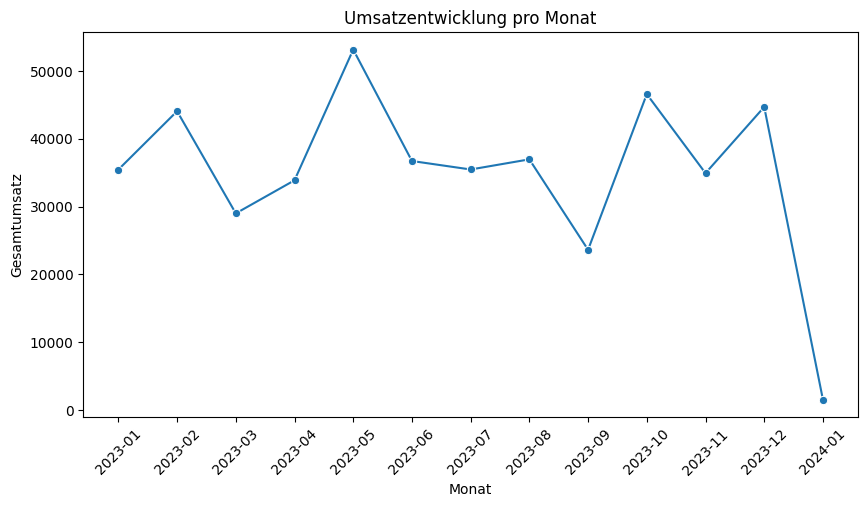

In [34]:
# Umsatz pro Monat berechnen
monthly_sales = df.groupby('year_month')['Total Amount'].sum()

# Plot erstellen
plt.figure(figsize=(10,5))
sns.lineplot(x=monthly_sales.index.astype(str), y=monthly_sales.values, marker='o')
plt.xticks(rotation=45)
plt.title("Umsatzentwicklung pro Monat")
plt.ylabel("Gesamtumsatz")
plt.xlabel("Monat")
plt.show()

**2. Welch Altersgruppe brachte den höchsten Umsatz?**

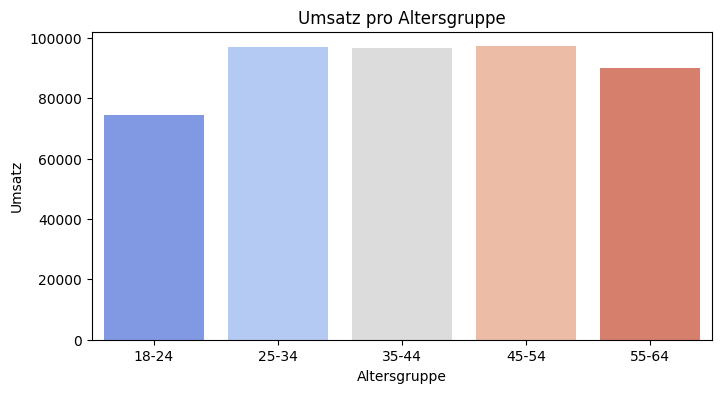

In [ ]:
# Umsatz pro Altersgruppe
age_group_sales = df.groupby('Age Group')['Total Amount'].sum()

# Plot erstellen
plt.figure(figsize=(8,4))
sns.barplot(x=age_group_sales.index, y=age_group_sales.values, hue=age_group_sales.index, palette="coolwarm", legend=False)
plt.title("Umsatz pro Altersgruppe")
plt.ylabel("Umsatz")
plt.xlabel("Altersgruppe")
plt.show()

**3. Gibt es Unterschiede im Kaufverhalten zwischen Frauen und Männern?**

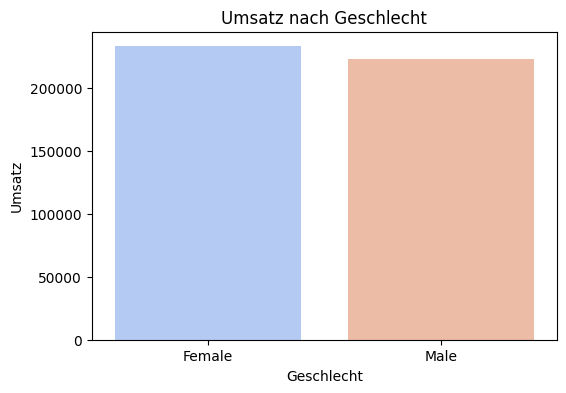

In [40]:
# Umsatz nach Geschlecht berechnen
gender_sales = df.groupby('Gender')['Total Amount'].sum()

# Plot erstellen
plt.figure(figsize=(6,4))
sns.barplot(x=gender_sales.index, y=gender_sales.values, hue=gender_sales.index, palette="coolwarm", legend=False)
plt.title("Umsatz nach Geschlecht")
plt.ylabel("Umsatz")
plt.xlabel("Geschlecht")
plt.show()

**4. Welche Produktkategorie ist der Bestseller?**

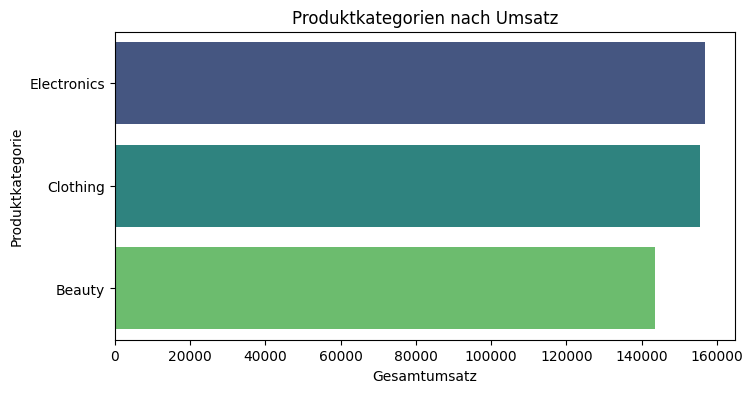

In [48]:
# Produktkategorie nach Umsatz
top_products = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)

# Plot erstellen
plt.figure(figsize=(8,4))
sns.barplot(x=top_products.values, y=top_products.index, hue=top_products.index, palette="viridis", legend=False)
plt.title("Produktkategorien nach Umsatz")
plt.xlabel("Gesamtumsatz")
plt.ylabel("Produktkategorie")
plt.show()

### Erkenntnisse aus der Analyse

**Umsatzentwicklung**

- Der Umsatz schwankt deutlich von Monat zu Monat
- Besonders auffällig ist der starke Rückgang des Umsatzes seit Dezember 2023, was allerdings darauf zurückzuführen ist, dass es für Januar 2024 nur zwei Umsätze gab.
- Der höchste Umsatz wurde im Mai 2023 generiert

**Umsatz nach Altersgruppe**

- Den höchsten Umsatz brachte die Altersgruppe 45-54
- Allerdings ist zu erkennen, dass die Umsätze der Altersgruppen zwischen 25 und 54 sehr nah bei einander liegen
- Die Altersgruppe 18-24 brachte den niedrigsten Umsatz, gefolgt von der Altersgruppe 55-64


**Kaufverhalten von Frauen und Männern**

- Es gibt keinen signifikanten Unterschied im Umsatz zwischen Frauen und Männern

**Meistverkaufte Produktkategorie**

- Die Produktkategorie "Electronics" brachte den höchsten Umsatz
- Ein ähnlich hohen Umsatz brachte die Kategorie "Clothing"
- Am schlechtesten verkaufte sich die Produktkategorie "Beauty"


### Tableau-Dashboard 

Zusätzlich habe ich noch ein Tableau Dashboard erstellt, welches in meinem Github Repository unter **"Tableau_dashboard"** zu finden ist.